In [ ]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
from google.colab import drive
import os
import pandas as pd
import pywt
import csv
import os
from glob import glob
# import noisereduce as nr
import shutil
from scipy.io import wavfile
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix, recall_score,make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, StackingClassifier, AdaBoostClassifier
# from sklearn.externals import joblib
from sklearn import preprocessing
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import metrics

In [ ]:
drive.mount('/content/drive')
directory = "/content"
base_path = "/content/drive/MyDrive/Skripsi"
MI_path = f'{base_path}{os.sep}MI/'
audio_files_MI = glob(MI_path  + '*.wav')
Preprocess_MI = f'{base_path}{os.sep}Preprocess_MI/'
normal_path = f'{base_path}{os.sep}Normal/'
audio_files_normal = glob(normal_path  + '*.wav')
Preprocess_normal = f'{base_path}{os.sep}Preprocess_Normal/'
fitur_path = f'{base_path}{os.sep}fitur/'

Mounted at /content/drive


In [ ]:
df_combine = pd.read_excel(fitur_path +'df_combined.xlsx')
df_combine.drop('Unnamed: 0',inplace=True, axis =1)
df_combine

,MFCC Means,MFCC std,MFCC max,MFCC min,Entropy,Wavelet Means,Wavelet std,Wavelet max,Wavelet min,Med_mfcc,...,Med_wavelet,Var_wavelet,Skew_wavelet,Q1_wavelet,Q3_wavelet,IQR_wavelet,MinMax_wavelet,Kurt_wavelet,Annotation,Label
0,-42.489068,238.983734,190.520660,-1120.055054,13.400216,3.603139e-08,0.000138,0.001983,-0.001267,2.904536,...,-3.346840e-09,1.912756e-08,0.269838,-0.000004,3.538103e-06,0.000007,0.003249,19.177630,1,MI
1,-34.174446,165.524597,153.348816,-762.436340,13.400979,-9.297025e-10,0.003196,0.044476,-0.042840,0.000000,...,1.681105e-22,1.021748e-05,0.171079,-0.000001,1.068919e-06,0.000002,0.087317,71.359029,1,MI
2,-36.680137,201.698227,212.238052,-938.331787,13.400109,-7.685623e-08,0.000306,0.011637,-0.010879,1.494527,...,-1.177336e-08,9.347330e-08,1.615816,-0.000007,6.803801e-06,0.000014,0.022516,419.455408,1,MI
3,-36.746502,183.466980,165.402634,-850.696167,13.400141,-1.463084e-08,0.001234,0.014985,-0.025353,0.049883,...,3.467036e-09,1.522966e-06,-1.489506,-0.000004,4.427025e-06,0.000009,0.040337,88.837650,1,MI
4,-42.229770,227.120224,233.071777,-1062.309082,13.400175,8.514613e-08,0.000189,0.004734,-0.007856,1.968573,...,-3.901422e-09,3.557479e-08,-0.544867,-0.000004,3.435842e-06,0.000007,0.012590,83.406967,1,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,-43.221928,226.843018,203.569550,-1052.359009,13.399793,1.815064e-08,0.000311,0.010918,-0.010430,0.549520,...,-1.054110e-08,9.666980e-08,1.597842,-0.000001,9.355650e-07,0.000002,0.021348,117.568733,0,Normal
556,-39.745922,209.543106,203.362915,-977.815063,13.400005,-3.135907e-08,0.000328,0.016531,-0.012258,1.378954,...,6.903586e-09,1.075760e-07,2.933090,-0.000005,4.712389e-06,0.000009,0.028789,509.492473,0,Normal
557,-41.167892,227.668243,205.410080,-1074.227661,13.400058,7.227910e-08,0.000204,0.004129,-0.006110,2.411068,...,-2.821842e-08,4.169307e-08,-0.223834,-0.000007,5.739436e-06,0.000012,0.010239,58.348043,0,Normal
558,-36.364266,208.257187,148.874359,-972.107361,13.400248,-1.115729e-08,0.000858,0.007549,-0.008341,3.434311,...,1.533144e-08,7.369021e-07,-0.092440,-0.000007,8.130915e-06,0.000015,0.015890,21.022171,0,Normal


In [ ]:
dfpcarank = pd.read_excel(fitur_path +'FeatureRank_By_PCA.xlsx')
dfpcarank.drop('Unnamed: 0',inplace=True, axis =1)
dfpcarank

,PC1,Label
0,0.322524,MFCC min
1,0.288815,Wavelet std
2,0.280969,Wavelet max
3,0.278683,MinMax_wavelet
4,0.248549,MFCC Means
5,0.233980,Var_wavelet
6,0.153640,Kurt_wavelet
7,0.129482,Kurt_mfcc
8,0.111450,Q1_mfcc
9,0.022729,Wavelet Means


In [ ]:
featuresPCA = ['MFCC Means', 'MFCC min', 'Wavelet Means', 'Wavelet std', 'Wavelet max','Var_wavelet','Q1_wavelet','MinMax_wavelet','Kurt_wavelet','Skew_mfcc','Q1_mfcc','Kurt_mfcc'
             ]


In [ ]:
features = ['MFCC Means', 'MFCC std', 'MFCC max' ,'MFCC min','Entropy', 'Wavelet Means', 'Wavelet std', 'Wavelet max','Wavelet min',
             'Med_mfcc','Var_mfcc','Skew_mfcc','Q1_mfcc','Q3_mfcc','IQR_mfcc','MinMax_mfcc','Kurt_mfcc',
             'Med_wavelet','Var_wavelet','Skew_wavelet','Q1_wavelet','Q3_wavelet','IQR_wavelet','MinMax_wavelet','Kurt_wavelet'
             ]

In [ ]:
x_1 = df_combine[features].values
scaler_1 =  preprocessing.StandardScaler().fit(x_1)
X_scaled1 = scaler_1.transform(x_1)

y1 = df_combine['Annotation'].values 
print(Counter(y1)) 

Counter({1: 280, 0: 280})


In [ ]:
specificity = make_scorer(recall_score, pos_label=0)
sensitivity = make_scorer(recall_score, pos_label=1)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled1, y1, test_size = 0.3,random_state = 10)

In [ ]:
bagging_1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1))
bagging1_pca = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1))
boosting_1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1))
boosting1_pca = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1))

In [ ]:
estimators = [
    ('tree', DecisionTreeClassifier(max_depth=1, random_state=1)),
    ('svm', SVC(probability=True, random_state=1)),
    
]
stacking_1 = StackingClassifier(
    estimators=estimators,   
)
stacking1_pca = StackingClassifier(
    estimators=estimators,   
)

# Non Tuning

## Without PCA non tuning

### Bagging

In [ ]:
bagging_accur_non_tuning_nonpca = cross_val_score(bagging_1, X_scaled1, y1, scoring="accuracy", cv=5)
bagging_sensi_non_tuning_nonpca = cross_val_score(bagging_1, X_scaled1, y1, scoring=sensitivity, cv=5)
bagging_speci_non_tuning_nonpca = cross_val_score(bagging_1, X_scaled1, y1, scoring=specificity, cv=5)
print("Specificity masing-masing = ", bagging_speci_non_tuning_nonpca)
print("Sensitivity masing-masing = ", bagging_sensi_non_tuning_nonpca)
print("Accuracy masing-masing = ", bagging_accur_non_tuning_nonpca)
print("Rata-rata Specificity = ", bagging_speci_non_tuning_nonpca.mean())
print("Rata-rata Sensitivity = ", bagging_sensi_non_tuning_nonpca.mean())
print("Rata-rata Accuracy = ", bagging_accur_non_tuning_nonpca.mean())

Specificity masing-masing =  [0.92857143 0.96428571 0.96428571 0.98214286 0.94642857]
Sensitivity masing-masing =  [1. 1. 1. 1. 1.]
Accuracy masing-masing =  [0.96428571 0.98214286 0.98214286 0.99107143 0.97321429]
Rata-rata Specificity =  0.9571428571428571
Rata-rata Sensitivity =  1.0
Rata-rata Accuracy =  0.9785714285714284


### Boosting

In [ ]:
boosting_accur_non_tuning_nonpca = cross_val_score(boosting_1, X_scaled1, y1, scoring="accuracy", cv=5)
boosting_sensi_non_tuning_nonpca = cross_val_score(boosting_1, X_scaled1, y1, scoring=sensitivity, cv=5)
boosting_speci_non_tuning_nonpca = cross_val_score(boosting_1, X_scaled1, y1, scoring=specificity, cv=5)
print("Specificity masing-masing = ", boosting_speci_non_tuning_nonpca)
print("Sensitivity masing-masing = ", boosting_sensi_non_tuning_nonpca)
print("Accuracy masing-masing = ", boosting_accur_non_tuning_nonpca)
print("Rata-rata Specificity = ", boosting_speci_non_tuning_nonpca.mean())
print("Rata-rata Sensitivity = ", boosting_sensi_non_tuning_nonpca.mean())
print("Rata-rata Accuracy = ", boosting_accur_non_tuning_nonpca.mean())

Specificity masing-masing =  [0.98214286 1.         1.         1.         0.98214286]
Sensitivity masing-masing =  [1.         1.         1.         0.98214286 1.        ]
Accuracy masing-masing =  [0.99107143 1.         1.         1.         0.99107143]
Rata-rata Specificity =  0.9928571428571429
Rata-rata Sensitivity =  0.9964285714285716
Rata-rata Accuracy =  0.9964285714285716


### Stacking

In [ ]:
stacking_accur_non_tuning_nonpca = cross_val_score(stacking_1, X_scaled1, y1, scoring="accuracy", cv=5)
stacking_sensi_non_tuning_nonpca = cross_val_score(stacking_1, X_scaled1, y1, scoring=sensitivity, cv=5)
stacking_speci_non_tuning_nonpca = cross_val_score(stacking_1, X_scaled1, y1, scoring=specificity, cv=5)
print("Specificity masing-masing = ", stacking_speci_non_tuning_nonpca)
print("Sensitivity masing-masing = ", stacking_sensi_non_tuning_nonpca)
print("Accuracy masing-masing = ", stacking_accur_non_tuning_nonpca)
print("Rata-rata Specificity = ", stacking_speci_non_tuning_nonpca.mean())
print("Rata-rata Sensitivity = ", stacking_sensi_non_tuning_nonpca.mean())
print("Rata-rata Accuracy = ", stacking_accur_non_tuning_nonpca.mean())

Specificity masing-masing =  [0.94642857 0.98214286 0.98214286 0.98214286 0.96428571]
Sensitivity masing-masing =  [0.98214286 1.         1.         0.98214286 1.        ]
Accuracy masing-masing =  [0.96428571 0.99107143 0.99107143 0.98214286 0.98214286]
Rata-rata Specificity =  0.9714285714285713
Rata-rata Sensitivity =  0.9928571428571429
Rata-rata Accuracy =  0.9821428571428571


## With PCA Non tuning

In [ ]:
x_2 = df_combine[featuresPCA].values
scaler_2 =  preprocessing.StandardScaler().fit(x_2)
X_scaled2 = scaler_2.transform(x_2)

y2 = df_combine['Annotation'].values 
print(Counter(y2))

Counter({1: 280, 0: 280})


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size = 0.3,random_state = 10)

### Bagging

In [ ]:
bagging_accur_non_tuning_pca = cross_val_score(bagging_1, X_scaled2, y2, scoring="accuracy", cv=5)
bagging_sensi_non_tuning_pca = cross_val_score(bagging_1, X_scaled2, y2, scoring=sensitivity, cv=5)
bagging_speci_non_tuning_pca = cross_val_score(bagging_1, X_scaled2, y2, scoring=specificity, cv=5)
print("Specificity masing-masing = ", bagging_speci_non_tuning_pca)
print("Sensitivity masing-masing = ", bagging_sensi_non_tuning_pca)
print("Accuracy masing-masing = ", bagging_accur_non_tuning_pca)
print("Rata-rata Specificity = ", bagging_speci_non_tuning_pca.mean())
print("Rata-rata Sensitivity = ", bagging_sensi_non_tuning_pca.mean())
print("Rata-rata Accuracy = ", bagging_accur_non_tuning_pca.mean())

Specificity masing-masing =  [0.92857143 0.96428571 0.96428571 0.98214286 0.94642857]
Sensitivity masing-masing =  [1. 1. 1. 1. 1.]
Accuracy masing-masing =  [0.96428571 0.98214286 0.98214286 0.99107143 0.97321429]
Rata-rata Specificity =  0.9571428571428571
Rata-rata Sensitivity =  1.0
Rata-rata Accuracy =  0.9785714285714284


### Boosting

In [ ]:
boosting_accur_non_tuning_pca = cross_val_score(boosting_1, X_scaled2, y2, scoring="accuracy", cv=5)
boosting_sensi_non_tuning_pca = cross_val_score(boosting_1, X_scaled2, y2, scoring=sensitivity, cv=5)
boosting_speci_non_tuning_pca = cross_val_score(boosting_1, X_scaled2, y2, scoring=specificity, cv=5)
print("Specificity masing-masing = ", boosting_speci_non_tuning_pca)
print("Sensitivity masing-masing = ", boosting_sensi_non_tuning_pca)
print("Accuracy masing-masing = ", boosting_accur_non_tuning_pca)
print("Rata-rata Specificity = ", boosting_speci_non_tuning_pca.mean())
print("Rata-rata Sensitivity = ", boosting_sensi_non_tuning_pca.mean())
print("Rata-rata Accuracy = ", boosting_accur_non_tuning_pca.mean())

Specificity masing-masing =  [0.98214286 1.         1.         1.         0.98214286]
Sensitivity masing-masing =  [1. 1. 1. 1. 1.]
Accuracy masing-masing =  [0.99107143 1.         1.         1.         0.99107143]
Rata-rata Specificity =  0.9928571428571429
Rata-rata Sensitivity =  1.0
Rata-rata Accuracy =  0.9964285714285716


### Stacking

In [ ]:
stacking_accur_non_tuning_pca = cross_val_score(stacking_1, X_scaled1, y1, scoring="accuracy", cv=5)
stacking_sensi_non_tuning_pca = cross_val_score(stacking_1, X_scaled1, y1, scoring=sensitivity, cv=5)
stacking_speci_non_tuning_pca = cross_val_score(stacking_1, X_scaled1, y1, scoring=specificity, cv=5)
print("Specificity masing-masing = ", stacking_speci_non_tuning_pca)
print("Sensitivity masing-masing = ", stacking_sensi_non_tuning_pca)
print("Accuracy masing-masing = ", stacking_accur_non_tuning_pca)
print("Rata-rata Specificity = ", stacking_speci_non_tuning_pca.mean())
print("Rata-rata Sensitivity = ", stacking_sensi_non_tuning_pca.mean())
print("Rata-rata Accuracy = ", stacking_accur_non_tuning_pca.mean())

Specificity masing-masing =  [0.94642857 0.98214286 0.98214286 0.98214286 0.96428571]
Sensitivity masing-masing =  [0.98214286 1.         1.         0.98214286 1.        ]
Accuracy masing-masing =  [0.96428571 0.99107143 0.99107143 0.98214286 0.98214286]
Rata-rata Specificity =  0.9714285714285713
Rata-rata Sensitivity =  0.9928571428571429
Rata-rata Accuracy =  0.9821428571428571


# Tuning

In [ ]:
bagging_param = {
    'n_estimators' : [50,100,150,200],
    'max_samples' : [5,10,100],
    'base_estimator' : [DecisionTreeClassifier(random_state=1)]
  }

parameters_ab = {
        'n_estimators' : [10,20,30,40,50],
        'learning_rate' : [0.01, 0.1, 1],  
        'base_estimator' : [DecisionTreeClassifier(random_state=1)],
        "base_estimator__max_depth": [2, 4, 6],
        }

stacking_param = {
  'final_estimator' : [DecisionTreeClassifier(), SVC()],
  'stack_method' : ['predict_proba', 'decision_function', 'predict'],
  'n_jobs'  : [1,2,3],
  "tree__max_depth": [2, 4, 6],
  "svm__C": [0.1, 1, 10],
  "svm__gamma": [0.1, 1, 10]
  }

##Bagging (Without PCA)

In [ ]:
bagging_tuning = BaggingClassifier()

In [ ]:
search_bagging1 = GridSearchCV(bagging_tuning,
                        bagging_param,
                        scoring='accuracy',
                        cv = 5,
                        verbose=1)
search_bagging1.fit(X_scaled1, y1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_samples': [5, 10, 100],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
search_bagging_pca = GridSearchCV(bagging_tuning,
                        bagging_param,
                        scoring='accuracy',
                        
                        verbose=1)
search_bagging_pca.fit(X_scaled2, y2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=BaggingClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_samples': [5, 10, 100],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
bagging1_best_acc_score = search_bagging1.best_score_
bagging1_best_parameter = search_bagging1.best_params_
print("Akurasi terbaik = ", bagging1_best_acc_score)
print("Parameter terbaik = ", bagging1_best_parameter)

Akurasi terbaik =  0.9910714285714286
Parameter terbaik =  {'base_estimator': DecisionTreeClassifier(random_state=1), 'max_samples': 100, 'n_estimators': 100}


In [ ]:
bagging_pca_best_acc_score = search_bagging_pca.best_score_
bagging_pca_best_parameter = search_bagging_pca.best_params_
print("Akurasi terbaik = ", bagging_pca_best_acc_score)
print("Parameter terbaik = ", bagging_pca_best_parameter)

Akurasi terbaik =  0.9910714285714286
Parameter terbaik =  {'base_estimator': DecisionTreeClassifier(random_state=1), 'max_samples': 100, 'n_estimators': 50}


In [ ]:
n_estimators_bagging = bagging1_best_parameter["n_estimators"]
max_samples_bagging = bagging1_best_parameter["max_samples"]
base_estimator_bagging = bagging1_best_parameter["base_estimator"]




bagging_tuning = BaggingClassifier(n_estimators = n_estimators_bagging,max_samples=max_samples_bagging,base_estimator=base_estimator_bagging)


In [ ]:
n_estimators_bagging_pca = bagging_pca_best_parameter["n_estimators"]
max_samples_bagging_pca = bagging_pca_best_parameter["max_samples"]
base_estimator_bagging_pca = bagging_pca_best_parameter["base_estimator"]

bagging_tuning_pca = BaggingClassifier(n_estimators = n_estimators_bagging_pca,max_samples=max_samples_bagging_pca,base_estimator=base_estimator_bagging)

In [ ]:
bagging_tuning_speci_nonpca = cross_val_score(bagging_tuning, X_scaled1, y1, scoring="accuracy", cv=5)
bagging_tuning_sensi_nonpca = cross_val_score(bagging_tuning, X_scaled1, y1, scoring=sensitivity, cv=5)
bagging_tuning_accur_nonpca = cross_val_score(bagging_tuning, X_scaled1, y1, scoring=specificity, cv=5)
print("Specificity masing-masing = ", bagging_tuning_speci_nonpca)
print("Sensitivity masing-masing = ", bagging_tuning_sensi_nonpca)
print("Accuracy masing-masing = ", bagging_tuning_accur_nonpca)
print("Rata-rata Specificity = ", bagging_tuning_speci_nonpca.mean())
print("Rata-rata Sensitivity = ", bagging_tuning_sensi_nonpca.mean())
print("Rata-rata Accuracy = ", bagging_tuning_accur_nonpca.mean())

Specificity masing-masing =  [0.96428571 1.         1.         1.         0.99107143]
Sensitivity masing-masing =  [1. 1. 1. 1. 1.]
Accuracy masing-masing =  [0.92857143 1.         1.         1.         0.98214286]
Rata-rata Specificity =  0.9910714285714286
Rata-rata Sensitivity =  1.0
Rata-rata Accuracy =  0.9821428571428571


### Bagging Tuning With PCA

In [ ]:
bagging_tuning_speci_withpca = cross_val_score(bagging_tuning_pca, X_scaled2, y2, scoring="accuracy", cv=5)
bagging_tuning_sensi_withpca = cross_val_score(bagging_tuning_pca, X_scaled2, y2, scoring=sensitivity, cv=5)
bagging_tuning_accur_withpca = cross_val_score(bagging_tuning_pca, X_scaled2, y2, scoring=specificity, cv=5)
print("Specificity masing-masing = ", bagging_tuning_speci_withpca)
print("Sensitivity masing-masing = ", bagging_tuning_sensi_withpca)
print("Accuracy masing-masing = ", bagging_tuning_accur_withpca)
print("Rata-rata Specificity = ", bagging_tuning_speci_withpca.mean())
print("Rata-rata Sensitivity = ", bagging_tuning_sensi_withpca.mean())
print("Rata-rata Accuracy = ", bagging_tuning_accur_withpca.mean())

Specificity masing-masing =  [0.96428571 1.         1.         1.         0.99107143]
Sensitivity masing-masing =  [1. 1. 1. 1. 1.]
Accuracy masing-masing =  [0.92857143 1.         1.         1.         0.98214286]
Rata-rata Specificity =  0.9910714285714286
Rata-rata Sensitivity =  1.0
Rata-rata Accuracy =  0.9821428571428571


### Boosting Without PCA

In [ ]:
boosting_tuning = AdaBoostClassifier()

In [ ]:
search_boosting1 = GridSearchCV(boosting_tuning,
                        parameters_ab,
                        scoring='accuracy',
                        cv = 5,
                        )
search_boosting1.fit(X_scaled1, y1)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=2,
                                                                   random_state=1)],
                         'base_estimator__max_depth': [2, 4, 6],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [ ]:
search_boosting_pca = GridSearchCV(boosting_tuning,
                        parameters_ab,
                        scoring='accuracy',
                        cv = 5,
                        
                        )
search_boosting_pca.fit(X_scaled2, y2)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=2,
                                                                   random_state=1)],
                         'base_estimator__max_depth': [2, 4, 6],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [ ]:
ab1_best_acc_score = search_boosting1.best_score_
ab1_best_parameter = search_boosting1.best_params_
print("Akurasi terbaik = ", ab1_best_acc_score)
print("Parameter terbaik = ", ab1_best_parameter)

Akurasi terbaik =  0.9964285714285716
Parameter terbaik =  {'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 10}


In [ ]:
ab1_pca_best_acc_score = search_boosting_pca.best_score_
ab1_pca_best_parameter = search_boosting_pca.best_params_
print("Akurasi terbaik = ", ab1_pca_best_acc_score)
print("Parameter terbaik = ", ab1_pca_best_parameter)

Akurasi terbaik =  0.9964285714285716
Parameter terbaik =  {'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 10}


In [ ]:
learning_rate_boosting = ab1_best_parameter["learning_rate"]
n_estimators_boosting = ab1_best_parameter["n_estimators"]
base_estimator_boosting = ab1_best_parameter["base_estimator"]

boosting_tuning = AdaBoostClassifier(learning_rate=learning_rate_boosting, n_estimators=n_estimators_boosting,base_estimator = base_estimator_boosting)


In [ ]:
learning_rate_boosting_pca = ab1_pca_best_parameter["learning_rate"]
n_estimators_boosting_pca = ab1_pca_best_parameter["n_estimators"]
base_estimator_boosting_pca = ab1_pca_best_parameter["base_estimator"]

boosting_tuning_pca = AdaBoostClassifier(learning_rate=learning_rate_boosting_pca, n_estimators=n_estimators_boosting_pca,base_estimator = base_estimator_boosting_pca)

In [ ]:
boosting_tuning_speci_nonpca = cross_val_score(boosting_tuning, X_scaled1, y1, scoring="accuracy", cv=5)
boosting_tuning_sensi_nonpca = cross_val_score(boosting_tuning, X_scaled1, y1, scoring=sensitivity, cv=5)
boosting_tuning_accur_nonpca = cross_val_score(boosting_tuning, X_scaled1, y1, scoring=specificity, cv=5)
print("Specificity masing-masing = ", boosting_tuning_speci_nonpca)
print("Sensitivity masing-masing = ", boosting_tuning_sensi_nonpca)
print("Accuracy masing-masing = ", boosting_tuning_accur_nonpca)
print("Rata-rata Specificity = ", boosting_tuning_speci_nonpca.mean())
print("Rata-rata Sensitivity = ", boosting_tuning_sensi_nonpca.mean())
print("Rata-rata Accuracy = ", boosting_tuning_accur_nonpca.mean())

Specificity masing-masing =  [0.99107143 1.         1.         0.99107143 0.99107143]
Sensitivity masing-masing =  [1. 1. 1. 1. 1.]
Accuracy masing-masing =  [0.98214286 1.         1.         1.         0.98214286]
Rata-rata Specificity =  0.9946428571428573
Rata-rata Sensitivity =  1.0
Rata-rata Accuracy =  0.9928571428571429


### Boosting Tuning With PCA

In [ ]:
boosting_tuning_speci_pca = cross_val_score(boosting_tuning_pca, X_scaled2, y2, scoring="accuracy", cv=5)
boosting_tuning_sensi_pca = cross_val_score(boosting_tuning_pca, X_scaled2, y2, scoring=sensitivity, cv=5)
boosting_tuning_accur_pca = cross_val_score(boosting_tuning_pca, X_scaled2, y2, scoring=specificity, cv=5)
print("Specificity masing-masing = ", boosting_tuning_speci_pca)
print("Sensitivity masing-masing = ", boosting_tuning_sensi_pca)
print("Accuracy masing-masing = ", boosting_tuning_accur_pca)
print("Rata-rata Specificity = ", boosting_tuning_speci_pca.mean())
print("Rata-rata Sensitivity = ", boosting_tuning_sensi_pca.mean())
print("Rata-rata Accuracy = ", boosting_tuning_accur_pca.mean())

Specificity masing-masing =  [0.99107143 1.         1.         1.         0.99107143]
Sensitivity masing-masing =  [1. 1. 1. 1. 1.]
Accuracy masing-masing =  [0.98214286 1.         1.         1.         0.98214286]
Rata-rata Specificity =  0.9964285714285716
Rata-rata Sensitivity =  1.0
Rata-rata Accuracy =  0.9928571428571429


### Stacking Tuning Without PCA

In [ ]:
stack_tuning = StackingClassifier(estimators=estimators)

In [ ]:
search_stack1 = GridSearchCV(stack_tuning,
                        stacking_param,
                        scoring='accuracy',
                        cv = 5,
                        verbose=1)
search_stack1.fit(X_scaled1, y1)

In [ ]:
stack1_best_acc_score = search_stack1.best_score_
stack1_best_parameter = search_stack1.best_params_
print("Akurasi terbaik = ", stack1_best_acc_score)
print("Parameter terbaik = ", stack1_best_parameter)

Akurasi terbaik =  0.9946428571428573
Parameter terbaik =  {'final_estimator': DecisionTreeClassifier(), 'n_jobs': 1, 'stack_method': 'predict_proba', 'svm__C': 0.1, 'svm__gamma': 1, 'tree__max_depth': 2}


In [ ]:
search_stack2 = GridSearchCV(stack_tuning,
                        stacking_param,
                        scoring='accuracy',
                        cv = 5,
                        verbose=1)
search_stack2.fit(X_scaled2, y2)

In [ ]:
final_estimator = stack1_best_parameter["final_estimator"]
stack_method = stack1_best_parameter["stack_method"]
n_jobs_nonpca = stack1_best_parameter["n_jobs"]

estimators_tuning_nonpca = [
    ('tree', DecisionTreeClassifier(max_depth=2, random_state=1)),
    ('svm', SVC(probability=True, random_state=1,C=0.1,gamma=1)),
    
]




stack_tuning = StackingClassifier(estimators=estimators_tuning_nonpca,final_estimator=final_estimator,stack_method=stack_method,n_jobs=n_jobs_nonpca)


In [ ]:
stack2_best_acc_score = search_stack2.best_score_
stack2_best_parameter = search_stack2.best_params_
print("Akurasi terbaik = ", stack2_best_acc_score)
print("Parameter terbaik = ", stack2_best_parameter)

Akurasi terbaik =  0.9964285714285716
Parameter terbaik =  {'final_estimator': DecisionTreeClassifier(), 'n_jobs': 1, 'stack_method': 'predict_proba', 'svm__C': 0.1, 'svm__gamma': 10, 'tree__max_depth': 2}


In [ ]:
final_estimator2 = stack2_best_parameter["final_estimator"]
stack_method2 = stack2_best_parameter["stack_method"]
n_jobs2 = stack2_best_parameter["n_jobs"]


estimators2 = [
    ('tree', DecisionTreeClassifier(max_depth=2, random_state=1)),
    ('svm', SVC(probability=True, random_state=1,C=0.1,gamma=10)),
    
]

stack_tuning_2 = StackingClassifier(estimators=estimators2,final_estimator=final_estimator2,
                                    stack_method=stack_method2,n_jobs=n_jobs2)

In [ ]:
stack_tuning_speci_nonpca = cross_val_score(stack_tuning, X_scaled1, y1, scoring="accuracy", cv=5)
stack_tuning_sensi_nonpca = cross_val_score(stack_tuning, X_scaled1, y1, scoring=sensitivity, cv=5)
stack_tuning_accur_nonpca = cross_val_score(stack_tuning, X_scaled1, y1, scoring=specificity, cv=5)
print("Specificity masing-masing = ", stack_tuning_speci_nonpca)
print("Sensitivity masing-masing = ", stack_tuning_sensi_nonpca)
print("Accuracy masing-masing = ", stack_tuning_accur_nonpca)
print("Rata-rata Specificity = ", stack_tuning_speci_nonpca.mean())
print("Rata-rata Sensitivity = ", stack_tuning_sensi_nonpca.mean())
print("Rata-rata Accuracy = ", stack_tuning_accur_nonpca.mean())

Specificity masing-masing =  [0.99107143 1.         1.         0.99107143 0.99107143]
Sensitivity masing-masing =  [1.         1.         1.         0.98214286 1.        ]
Accuracy masing-masing =  [0.98214286 1.         1.         1.         0.98214286]
Rata-rata Specificity =  0.9946428571428573
Rata-rata Sensitivity =  0.9964285714285716
Rata-rata Accuracy =  0.9928571428571429


### Stacking Tuning With PCA

In [ ]:
stack_tuning_speci_pca = cross_val_score(stack_tuning_2, X_scaled2, y2, scoring="accuracy", cv=5)
stack_tuning_sensi_pca = cross_val_score(stack_tuning_2, X_scaled2, y2, scoring=sensitivity, cv=5)
stack_tuning_accur_pca = cross_val_score(stack_tuning_2, X_scaled2, y2, scoring=specificity, cv=5)
print("Specificity masing-masing = ", stack_tuning_speci_pca)
print("Sensitivity masing-masing = ", stack_tuning_sensi_pca)
print("Accuracy masing-masing = ", stack_tuning_accur_pca)
print("Rata-rata Specificity = ", stack_tuning_speci_pca.mean())
print("Rata-rata Sensitivity = ", stack_tuning_sensi_pca.mean())
print("Rata-rata Accuracy = ", stack_tuning_accur_pca.mean())

Specificity masing-masing =  [0.99107143 1.         1.         1.         0.99107143]
Sensitivity masing-masing =  [1. 1. 1. 1. 1.]
Accuracy masing-masing =  [0.98214286 1.         1.         1.         0.98214286]
Rata-rata Specificity =  0.9964285714285716
Rata-rata Sensitivity =  1.0
Rata-rata Accuracy =  0.9928571428571429


# Validasi

## Bagging

### Bagging non Tuning Without PCA

In [ ]:
bagging_1.fit(X_train1,y_train1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        random_state=1))

Hasil Prediksi dengan data train

In [ ]:
bagging_nontuning_val_nonpca = bagging_1.predict(X_train1)
print("Specificity  : ", metrics.recall_score(y_train1, bagging_nontuning_val_nonpca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_train1, bagging_nontuning_val_nonpca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_train1, bagging_nontuning_val_nonpca))



Specificity  :  0.9591836734693877
Sensitivity  :  1.0
Accuracy :  0.9795918367346939


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

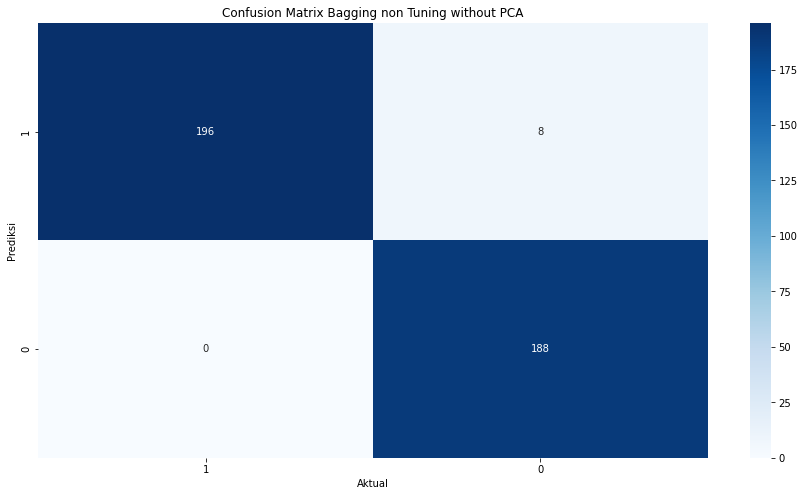

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train1, bagging_nontuning_val_nonpca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Bagging non Tuning without PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil Prediksi dengan data test

In [ ]:
bagging1_prediksi = bagging_1.predict(X_test1)
print("Specificity  : ", metrics.recall_score(y_test1, bagging1_prediksi,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_test1, bagging1_prediksi,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_test1, bagging1_prediksi))


Specificity  :  0.9642857142857143
Sensitivity  :  1.0
Accuracy :  0.9821428571428571


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

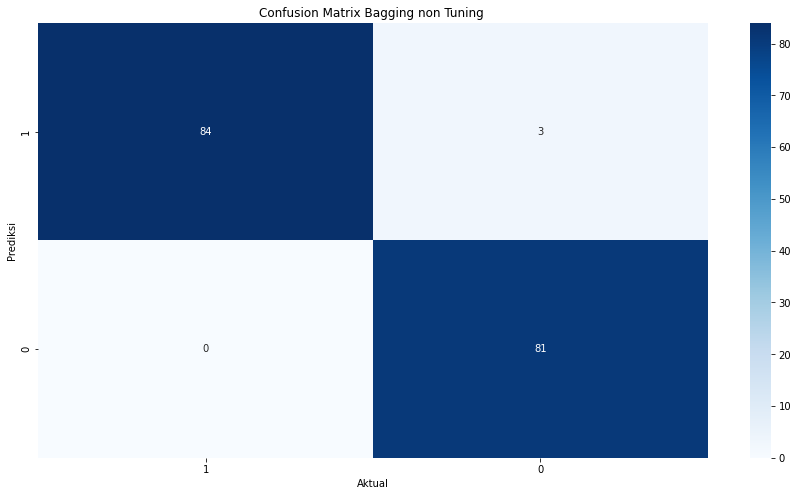

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test1, bagging1_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Bagging non Tuning ') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### Bagging non Tuning With PCA

In [ ]:
bagging1_pca.fit(X_train2,y_train2)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                        random_state=1))

Hasil prediksi pada data train

In [ ]:
bagging_nontuning_val_pca = bagging1_pca.predict(X_train2)
print("Specificity  : ", metrics.recall_score(y_train2, bagging_nontuning_val_pca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_train2, bagging_nontuning_val_pca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_train2, bagging_nontuning_val_pca))


Specificity  :  0.9591836734693877
Sensitivity  :  1.0
Accuracy :  0.9795918367346939


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

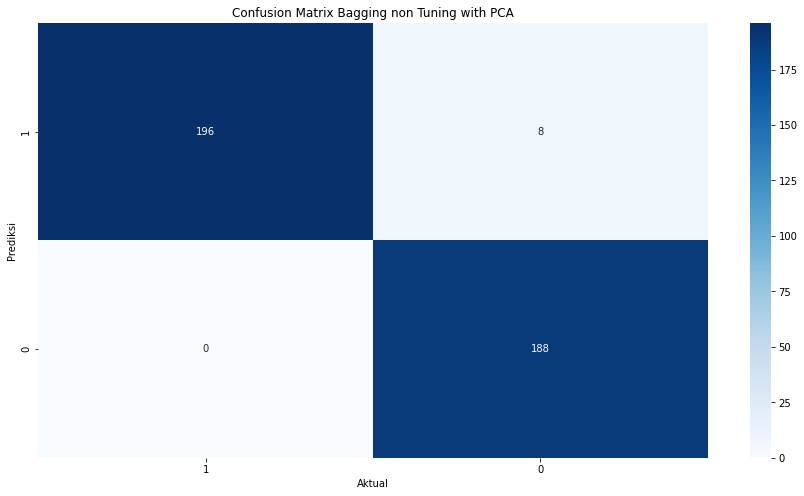

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train2, bagging_nontuning_val_pca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Bagging non Tuning with PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi pada data test

In [ ]:
bagging1_prediksi_pca = bagging1_pca.predict(X_test2)
print("Specificity  : ", metrics.recall_score(y_test2, bagging1_prediksi_pca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_test2, bagging1_prediksi_pca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_test2, bagging1_prediksi_pca))


Specificity  :  0.9642857142857143
Sensitivity  :  1.0
Accuracy :  0.9821428571428571


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

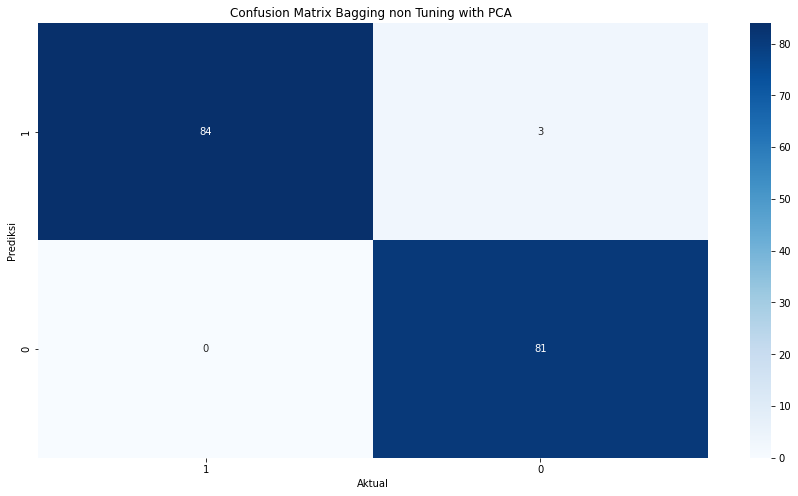

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test2, bagging1_prediksi_pca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Bagging non Tuning with PCA ') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### Bagging Tuning Without PCA

In [ ]:
bagging_tuning.fit(X_train1,y_train1)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_samples=100, n_estimators=100)

In [ ]:
bagging_tuning_pca.fit(X_train2,y_train2)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_samples=100, n_estimators=50)

Hasil prediksi pada data train

In [ ]:
bagging_tuning_val_nonpca = bagging_tuning.predict(X_train1)
print("Specificity  : ", metrics.recall_score(y_train1, bagging_tuning_val_nonpca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_train1, bagging_tuning_val_nonpca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_train1, bagging_tuning_val_nonpca))


Specificity  :  0.9948979591836735
Sensitivity  :  1.0
Accuracy :  0.9974489795918368


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

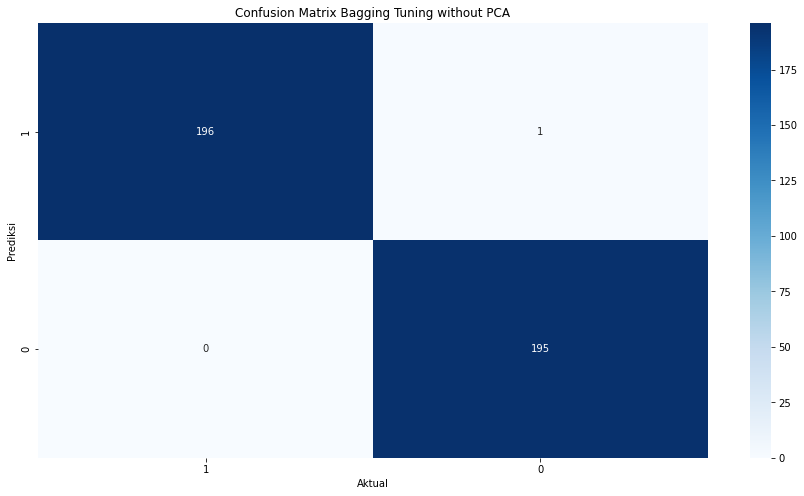

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train1, bagging_tuning_val_nonpca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Bagging Tuning without PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi pada data test

In [ ]:
bagging_tuning_nonpca_prediksi = bagging_tuning.predict(X_test1)
print("Specificity  : ", metrics.recall_score(y_test1, bagging_tuning_nonpca_prediksi,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_test1, bagging_tuning_nonpca_prediksi,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_test1, bagging_tuning_nonpca_prediksi))


Specificity  :  0.9880952380952381
Sensitivity  :  1.0
Accuracy :  0.9940476190476191


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

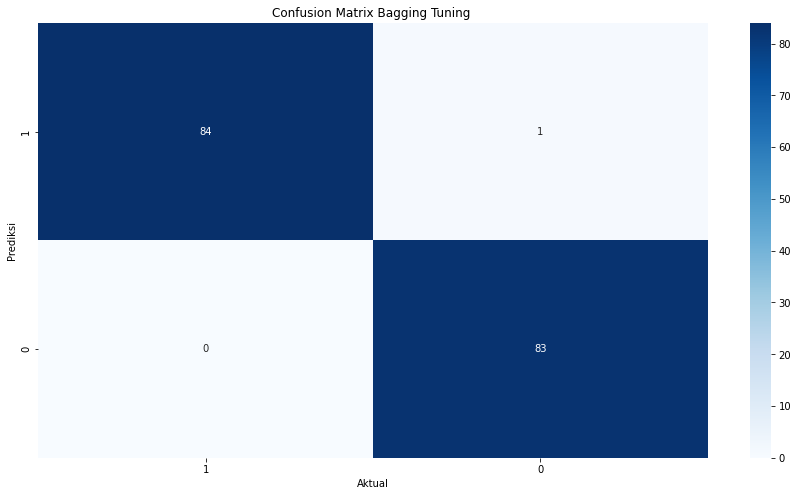

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test1, bagging_tuning_nonpca_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Bagging Tuning ') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### Bagging Tuning With PCA



Hasil prediksi pada data train

In [ ]:
bagging_tuning_val_pca = bagging_tuning_pca.predict(X_train2)
print("Specificity  : ", metrics.recall_score(y_train2, bagging_tuning_val_pca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_train2, bagging_tuning_val_pca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_train2, bagging_tuning_val_pca))

Specificity  :  0.9795918367346939
Sensitivity  :  1.0
Accuracy :  0.9897959183673469


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

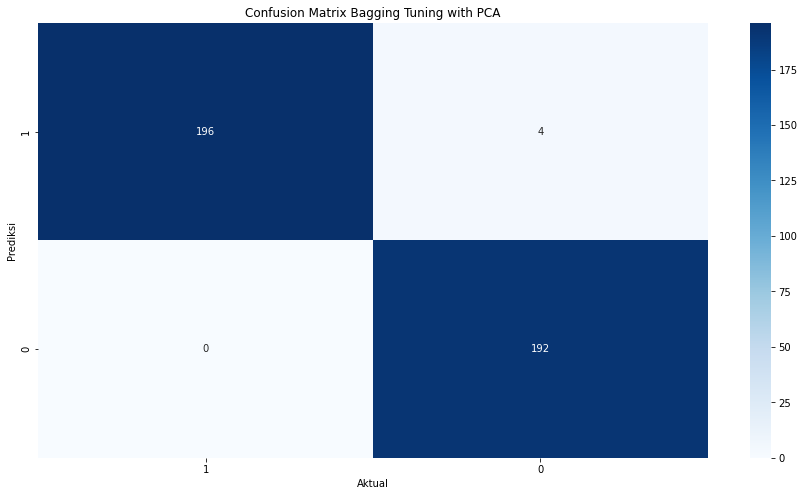

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train2, bagging_tuning_val_pca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Bagging Tuning with PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi pada data test

In [ ]:
bagging_tuning_pca_prediksi = bagging_tuning_pca.predict(X_test2)
print("Specificity  : ", metrics.recall_score(y_test2, bagging_tuning_pca_prediksi,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_test2, bagging_tuning_pca_prediksi,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_test2, bagging_tuning_pca_prediksi))


Specificity  :  0.9880952380952381
Sensitivity  :  1.0
Accuracy :  0.9940476190476191


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

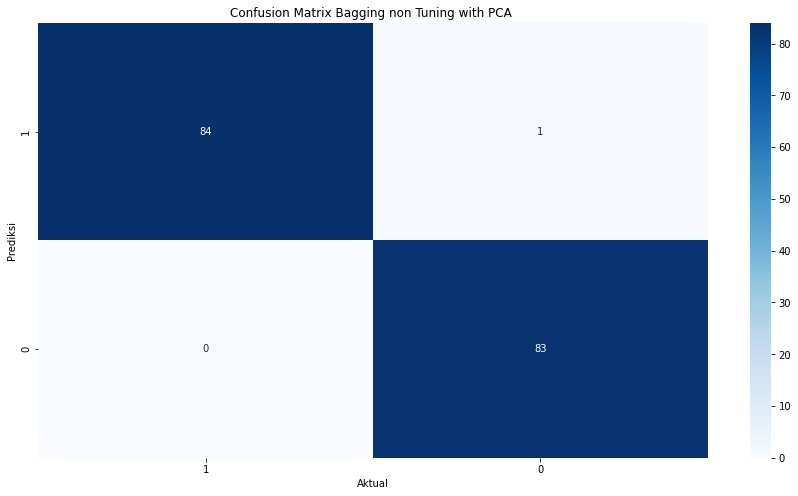

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test2, bagging_tuning_pca_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Bagging non Tuning with PCA ') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

## Boosting

### Boosting non Tuning Without PCA

In [ ]:
boosting_1.fit(X_train1, y_train1)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1))

In [ ]:
boosting1_pca.fit(X_train2, y_train2)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1))

Hasil prediksi pada data train

In [ ]:
boosting_nontuning_val_nonpca = boosting_1.predict(X_train1)
print("Specificity  : ", metrics.recall_score(y_train1, boosting_nontuning_val_nonpca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_train1, boosting_nontuning_val_nonpca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_train1, boosting_nontuning_val_nonpca))

Specificity  :  1.0
Sensitivity  :  1.0
Accuracy :  1.0


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

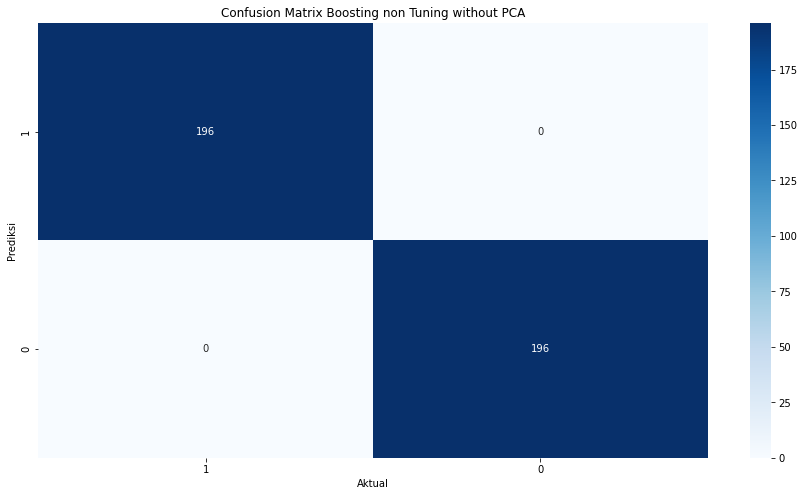

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train1, boosting_nontuning_val_nonpca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Boosting non Tuning without PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi pada data test

Specificity  :  1.0
Sensitivity  :  1.0
Accuracy :  1.0


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

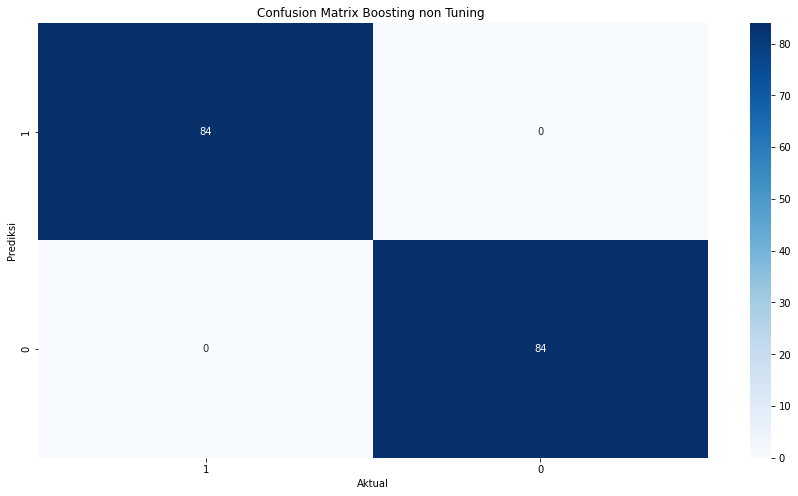

In [ ]:
boosting_nontuning_prediksi_nonpca = boosting_1.predict(X_test1)
print("Specificity  : ", metrics.recall_score(y_test1, boosting_nontuning_prediksi_nonpca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_test1, boosting_nontuning_prediksi_nonpca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_test1, boosting_nontuning_prediksi_nonpca))

cf_matrix = metrics.confusion_matrix(y_test1,boosting_nontuning_prediksi_nonpca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Boosting non Tuning ') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])


### Boosting non Tuning With PCA

Hasil prediksi pada data train

In [ ]:
boosting_nontuning_val_pca = boosting1_pca.predict(X_train2)
print("Specificity  : ", metrics.recall_score(y_train2, boosting_nontuning_val_pca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_train2, boosting_nontuning_val_pca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_train2, boosting_nontuning_val_pca))

Specificity  :  1.0
Sensitivity  :  1.0
Accuracy :  1.0


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

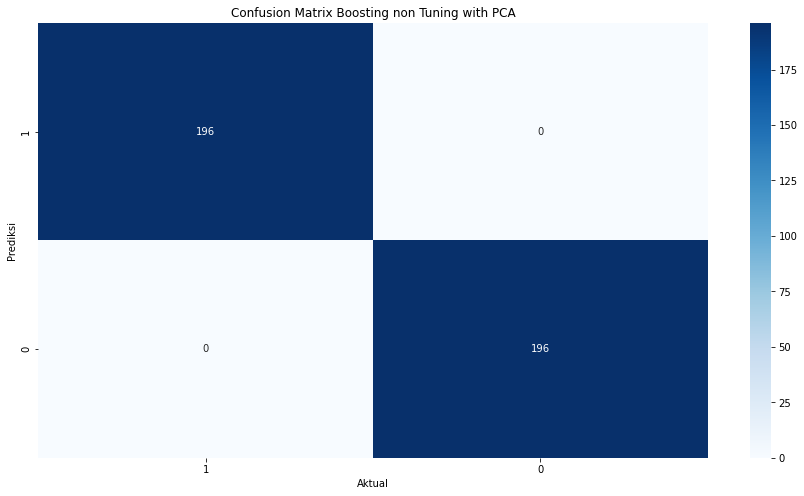

In [ ]:
cf_matrix = metrics.confusion_matrix(y_train2, boosting_nontuning_val_pca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Boosting non Tuning with PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi pada data test

Specificity  :  1.0
Sensitivity  :  1.0
Accuracy :  1.0


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

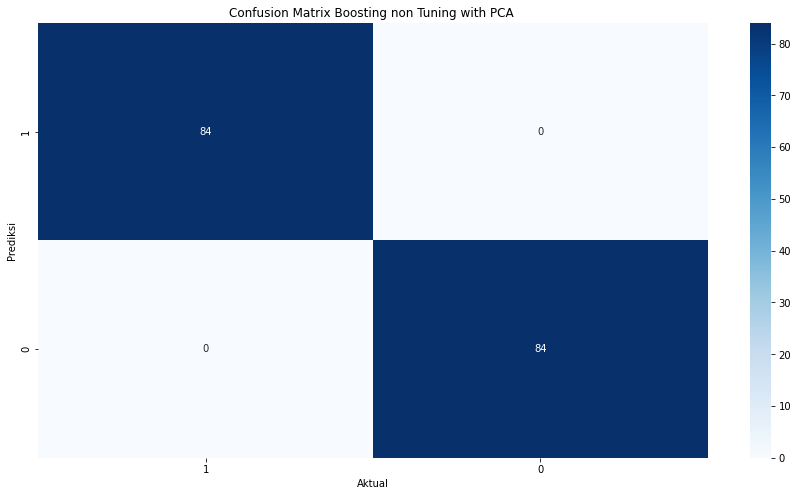

In [ ]:
boosting_non_tuning_pca = boosting1_pca.predict(X_test2)
print("Specificity  : ", metrics.recall_score(y_test2, boosting_non_tuning_pca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_test2, boosting_non_tuning_pca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_test2, boosting_non_tuning_pca))


cf_matrix = metrics.confusion_matrix(y_test2, boosting_non_tuning_pca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Boosting non Tuning with PCA ') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

###Boosting Tuning Without PCA

In [ ]:
boosting_tuning.fit(X_train1, y_train1)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=10)

In [ ]:
boosting_tuning_pca.fit(X_train2, y_train2)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=10)

Hasil prediksi pada data train

Specificity  :  1.0
Sensitivity  :  1.0
Accuracy :  1.0


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

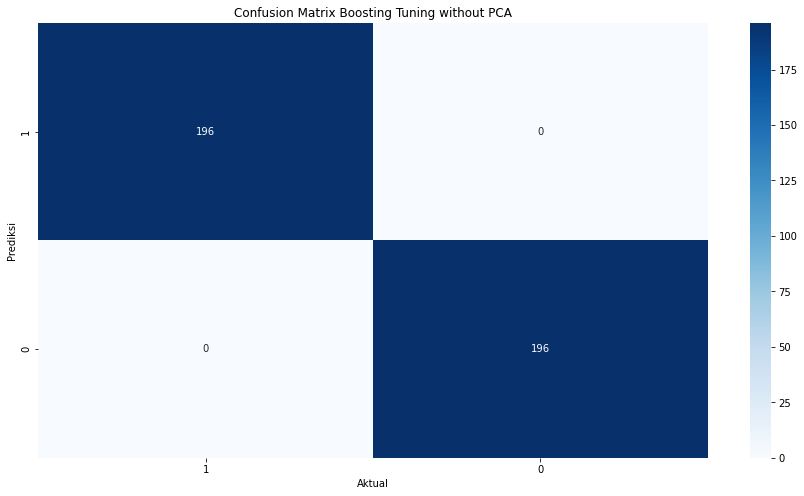

In [ ]:
boosting_tuning_nonpca = boosting_tuning.predict(X_train1)
print("Specificity  : ", metrics.recall_score(y_train1, boosting_tuning_nonpca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_train1, boosting_tuning_nonpca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_train1, boosting_tuning_nonpca))

cf_matrix = metrics.confusion_matrix(y_train1, boosting_tuning_nonpca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Boosting Tuning without PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi pada data test

Specificity  :  1.0
Sensitivity  :  1.0
Accuracy :  1.0


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

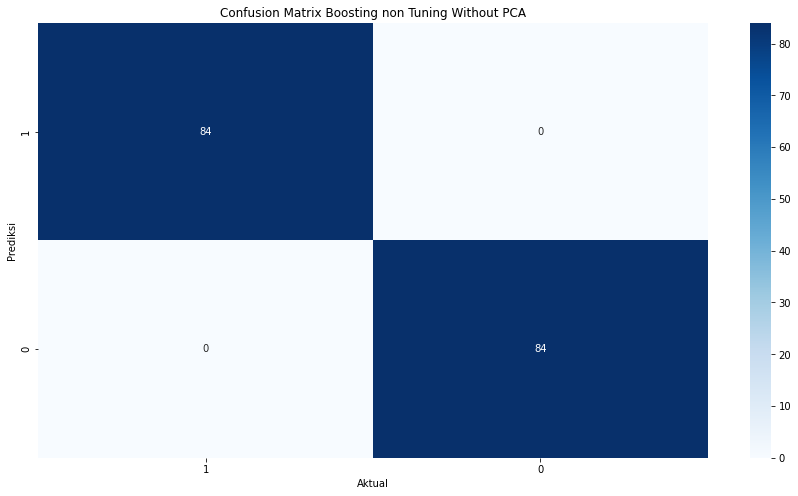

In [ ]:
boosting_tuning_prediksi_nonpca = boosting_tuning.predict(X_test1)
print("Specificity  : ", metrics.recall_score(y_test1, boosting_tuning_prediksi_nonpca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_test1, boosting_tuning_prediksi_nonpca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_test1, boosting_tuning_prediksi_nonpca))

cf_matrix = metrics.confusion_matrix(y_test1,boosting_tuning_prediksi_nonpca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Boosting non Tuning Without PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

###Boosting Tuning With PCA

Hasil prediksi pada data train

Specificity  :  1.0
Sensitivity  :  1.0
Accuracy :  1.0


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

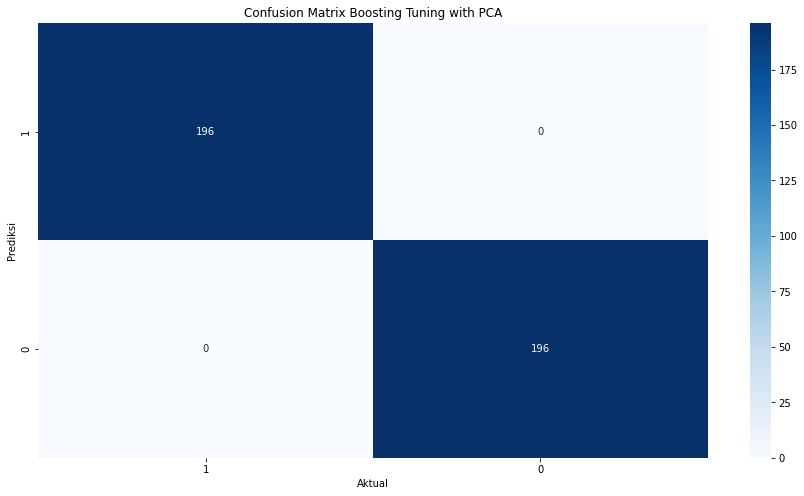

In [ ]:
boosting_tuning_pca = boosting_tuning_pca.predict(X_train2)
print("Specificity  : ", metrics.recall_score(y_train2, boosting_tuning_pca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_train2, boosting_tuning_pca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_train2, boosting_tuning_pca))

cf_matrix = metrics.confusion_matrix(y_train2, boosting_tuning_pca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Boosting Tuning with PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi pada data test

In [ ]:
boosting_tuning_prediksi_pca = boosting_tuning_pca.predict(X_test2)
print("Specificity  : ", metrics.recall_score(y_test2, boosting_tuning_prediksi_pca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_test2, boosting_tuning_prediksi_pca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_test2, boosting_tuning_prediksi_pca))



Specificity  :  1.0
Sensitivity  :  1.0
Accuracy :  1.0


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

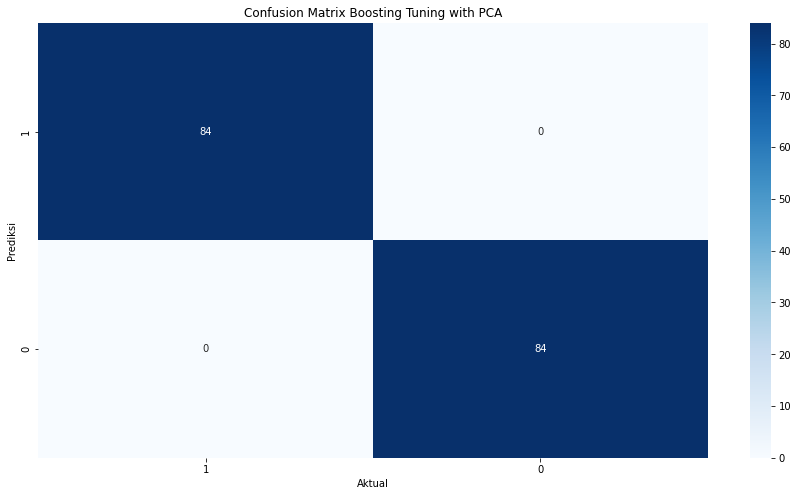

In [ ]:
cf_matrix = metrics.confusion_matrix(y_test2, boosting_tuning_prediksi_pca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Boosting Tuning with PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

## Stacking

In [ ]:
stacking_1.fit(X_train1,y_train1)

StackingClassifier(estimators=[('tree',
                                DecisionTreeClassifier(max_depth=1,
                                                       random_state=1)),
                               ('svm', SVC(probability=True, random_state=1))])

In [ ]:
stacking1_pca.fit(X_train2,y_train2)

StackingClassifier(estimators=[('tree',
                                DecisionTreeClassifier(max_depth=1,
                                                       random_state=1)),
                               ('svm', SVC(probability=True, random_state=1))])

In [ ]:
stack_tuning.fit(X_train1, y_train1)

StackingClassifier(estimators=[('tree',
                                DecisionTreeClassifier(max_depth=2,
                                                       random_state=1)),
                               ('svm',
                                SVC(C=0.1, gamma=1, probability=True,
                                    random_state=1))],
                   final_estimator=DecisionTreeClassifier(), n_jobs=1,
                   stack_method='predict_proba')

In [ ]:
stack_tuning_2.fit(X_train2, y_train2) #menggunakan PCA

StackingClassifier(estimators=[('tree',
                                DecisionTreeClassifier(max_depth=2,
                                                       random_state=1)),
                               ('svm',
                                SVC(C=0.1, gamma=10, probability=True,
                                    random_state=1))],
                   final_estimator=DecisionTreeClassifier(), n_jobs=1,
                   stack_method='predict_proba')

### Stacking non Tuning Without PCA

Hasil prediksi pada data train

Specificity  :  0.9948979591836735
Sensitivity  :  0.9948979591836735
Accuracy :  0.9948979591836735


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

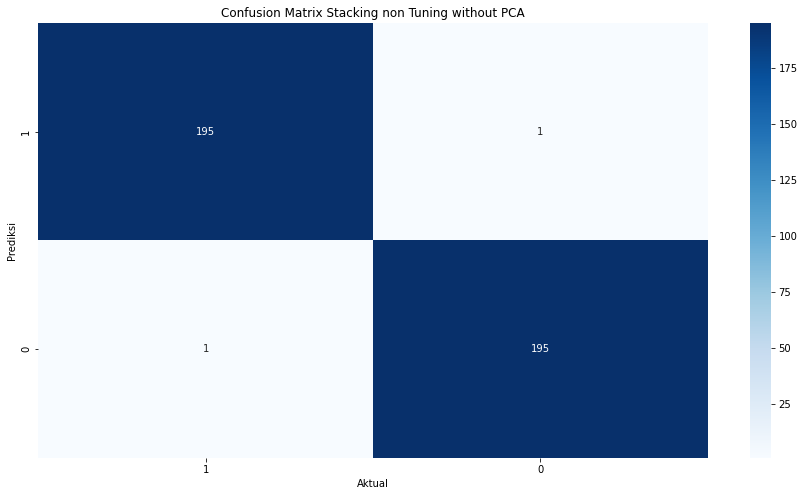

In [ ]:
stack_nontuning_nonpca = stacking_1.predict(X_train1)
print("Specificity  : ", metrics.recall_score(y_train1, stack_nontuning_nonpca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_train1, stack_nontuning_nonpca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_train1, stack_nontuning_nonpca))

cf_matrix = metrics.confusion_matrix(y_train1, stack_nontuning_nonpca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Stacking non Tuning without PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi pada data test

Specificity  :  0.9761904761904762
Sensitivity  :  1.0
Accuracy :  0.9880952380952381


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

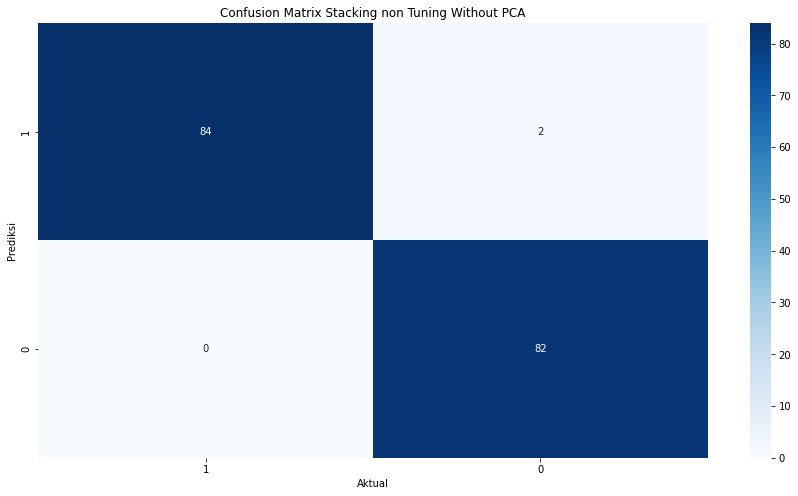

In [ ]:
stacking_nontuning_nonpca_prediksi = stacking_1.predict(X_test1)
print("Specificity  : ", metrics.recall_score(y_test1, stacking_nontuning_nonpca_prediksi,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_test1, stacking_nontuning_nonpca_prediksi,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_test1, stacking_nontuning_nonpca_prediksi))

cf_matrix = metrics.confusion_matrix(y_test1,stacking_nontuning_nonpca_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Stacking non Tuning Without PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### Stacking non Tuning With PCA

Hasil prediksi pada data train

Specificity  :  0.9846938775510204
Sensitivity  :  0.9948979591836735
Accuracy :  0.9897959183673469


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

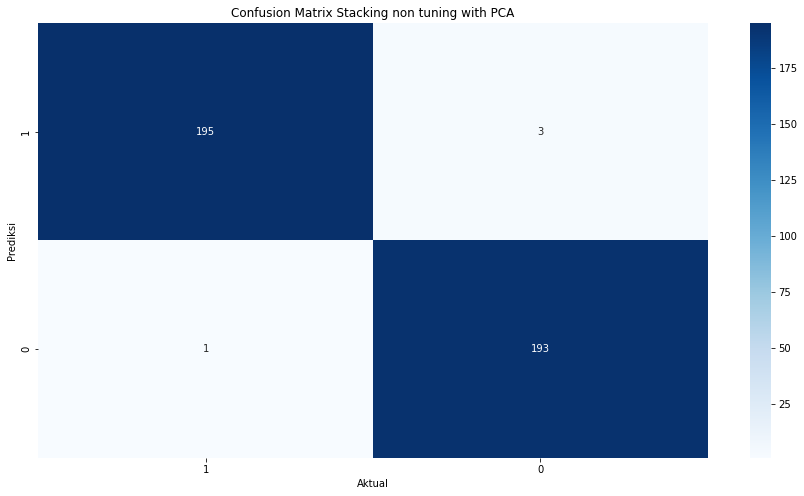

In [ ]:
stacking_nontuning_pca = stacking1_pca.predict(X_train2)
print("Specificity  : ", metrics.recall_score(y_train2, stacking_nontuning_pca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_train2, stacking_nontuning_pca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_train2, stacking_nontuning_pca))

cf_matrix = metrics.confusion_matrix(y_train2, stacking_nontuning_pca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Stacking non tuning with PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi pada data test

Specificity  :  0.9642857142857143
Sensitivity  :  0.9880952380952381
Accuracy :  0.9761904761904762


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

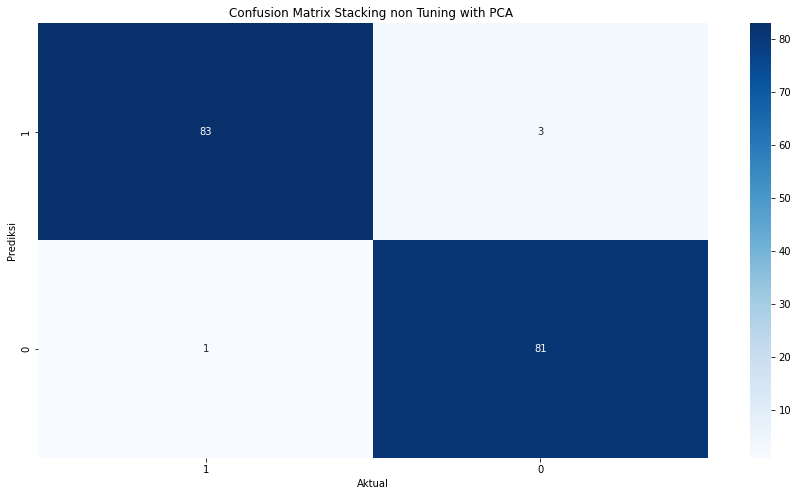

In [ ]:
stacking_nontuning_pca_prediksi = stacking1_pca.predict(X_test2)
print("Specificity  : ", metrics.recall_score(y_test2, stacking_nontuning_pca_prediksi,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_test2, stacking_nontuning_pca_prediksi,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_test2, stacking_nontuning_pca_prediksi))


cf_matrix = metrics.confusion_matrix(y_test2, stacking_nontuning_pca_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Stacking non Tuning with PCA ') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### Stacking Tuning Without PCA

Hasil prediksi pada data train

Specificity  :  1.0
Sensitivity  :  1.0
Accuracy :  1.0


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

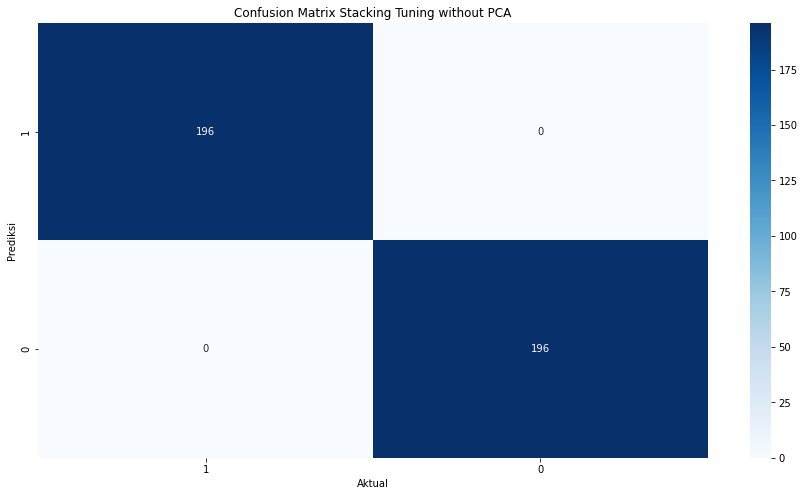

In [ ]:
stack_tuning_nonpca = stack_tuning.predict(X_train1)
print("Specificity  : ", metrics.recall_score(y_train1, stack_tuning_nonpca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_train1, stack_tuning_nonpca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_train1, stack_tuning_nonpca))

cf_matrix = metrics.confusion_matrix(y_train1, stack_tuning_nonpca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Stacking Tuning without PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi pada data test

Specificity  :  1.0
Sensitivity  :  1.0
Accuracy :  1.0


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

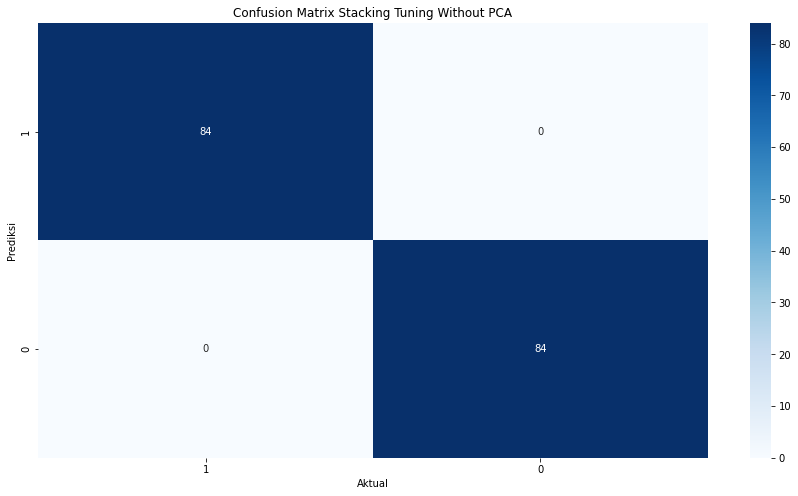

In [ ]:
stack_tuning_nonpca_prediksi = stack_tuning.predict(X_test1)
print("Specificity  : ", metrics.recall_score(y_test1, stack_tuning_nonpca_prediksi,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_test1, stack_tuning_nonpca_prediksi,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_test1, stack_tuning_nonpca_prediksi))

cf_matrix = metrics.confusion_matrix(y_test1,stack_tuning_nonpca_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Stacking Tuning Without PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

### Stacking Tuning With PCA

Hasil prediksi pada data train

Specificity  :  1.0
Sensitivity  :  1.0
Accuracy :  1.0


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

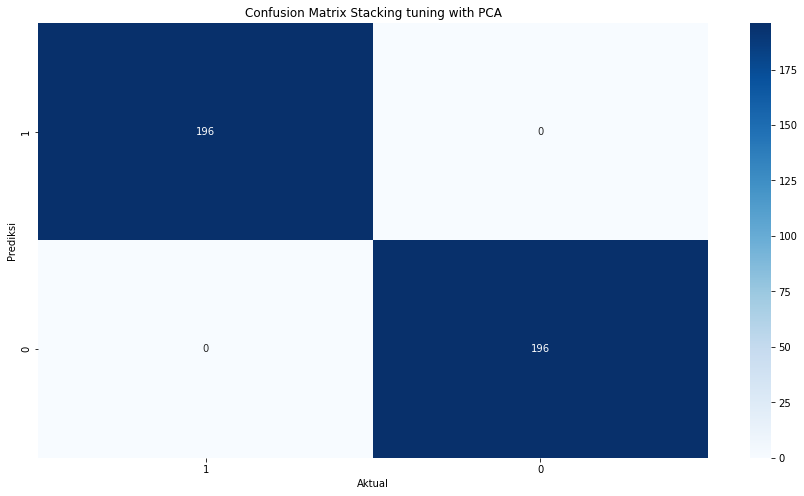

In [ ]:
stacking_tuning_pca = stack_tuning_2.predict(X_train2)
print("Specificity  : ", metrics.recall_score(y_train2, stacking_tuning_pca,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_train2, stacking_tuning_pca,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_train2, stacking_tuning_pca))

cf_matrix = metrics.confusion_matrix(y_train2, stacking_tuning_pca, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Stacking tuning with PCA') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

Hasil prediksi pada data test

Specificity  :  1.0
Sensitivity  :  1.0
Accuracy :  1.0


[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

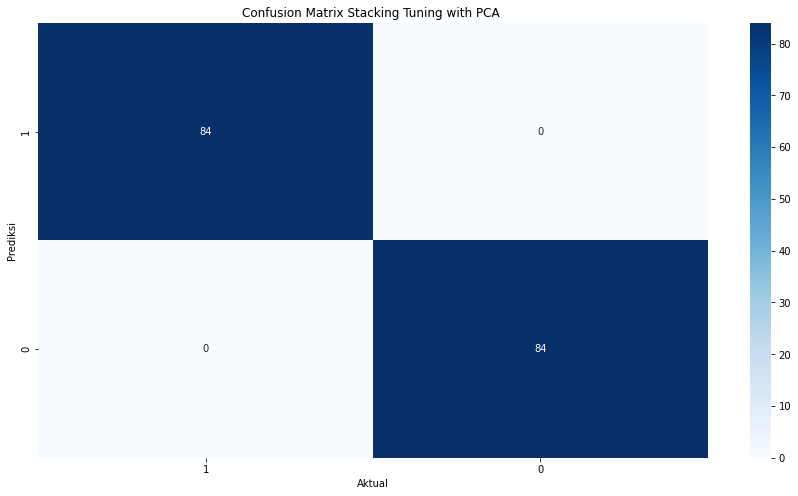

In [ ]:
stack_tuning_pca_prediksi = stack_tuning_2.predict(X_test2)
print("Specificity  : ", metrics.recall_score(y_test2, stack_tuning_pca_prediksi,pos_label=0))
print("Sensitivity  : ", metrics.recall_score(y_test2, stack_tuning_pca_prediksi,pos_label=1))
print("Accuracy : ", metrics.accuracy_score(y_test2, stack_tuning_pca_prediksi))


cf_matrix = metrics.confusion_matrix(y_test2, stack_tuning_pca_prediksi, labels=[1,0]).transpose()

plt.figure(figsize=(15,8))
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax)
ax.set_xlabel('Aktual')
ax.set_ylabel('Prediksi')
ax.set_title('Confusion Matrix Stacking Tuning with PCA ') 
ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

# Save Model

In [ ]:
import joblib
from joblib import dump, load

In [ ]:
def save_model(model, path):
  
  joblib.dump(model, path) 

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.01, n_estimators=10)

In [ ]:
#Non PCA Default
save_model(bagging_1, "/content/drive/MyDrive/Skripsi/Model/bagging_noPCA_default.pkl")
save_model(boosting_1, "/content/drive/MyDrive/Skripsi/Model/boosting_noPCA_default.pkl")
save_model(stacking_1, "/content/drive/MyDrive/Skripsi/Model/stacking_noPCA_default.pkl")
#Non PCA Tuned
save_model(bagging_tuning, "/content/drive/MyDrive/Skripsi/Model/bagging_noPCA_tuning.pkl")
save_model(boosting_tuning, "/content/drive/MyDrive/Skripsi/Model/boosting_noPCA_tuning.pkl")
save_model(stack_tuning, "/content/drive/MyDrive/Skripsi/Model/stacking_noPCA_tuning.pkl")

In [ ]:
#PCA Default
save_model(bagging1_pca, "/content/drive/MyDrive/Skripsi/Model/bagging_PCA_default.pkl")
save_model(boosting1_pca, "/content/drive/MyDrive/Skripsi/Model/boosting_PCA_default.pkl")
save_model(stacking1_pca, "/content/drive/MyDrive/Skripsi/Model/stacking_PCA_default.pkl")
#PCA Tuned
save_model(bagging_tuning_pca, "/content/drive/MyDrive/Skripsi/Model/bagging_PCA_tuning.pkl")
save_model(boosting_tuning_pca, "/content/drive/MyDrive/Skripsi/Model/boosting_PCA_tuning.pkl")
save_model(stack_tuning_2, "/content/drive/MyDrive/Skripsi/Model/stacking_PCA_tuning.pkl")

In [ ]:
stack_tuning

StackingClassifier(estimators=[('tree',
                                DecisionTreeClassifier(max_depth=2,
                                                       random_state=1)),
                               ('svm',
                                SVC(C=0.1, gamma=1, probability=True,
                                    random_state=1))],
                   final_estimator=DecisionTreeClassifier(), n_jobs=1,
                   stack_method='predict_proba')

In [ ]:
loaded_model = load('/content/drive/MyDrive/Skripsi/Model/stacking_PCA_tuning.pkl')

In [ ]:
predictions = loaded_model.predict(X_train2)

In [ ]:
test = cross_val_score(loaded_model, X_scaled2, y2, scoring="accuracy", cv=5)
print("Accuracy masing-masing = ", test)

Accuracy masing-masing =  [0.99107143 1.         1.         1.         0.99107143]
